# Bootstrap Mean Testing

*Pranav Shah*

## Introduction

In last week's assignment we looked at hypothesis testing stratified means of prices for automobiles. A limitation of the dataset last week was that many groups had a small sample size, which led to highly variable results. This week we'll use a resampling method - bootstrapping - and rerun the hypothesis testing from last week. Bootstrapping essentially randomly samples and resamples from a set of observations, with replacement, and calculates some statistic or model on the aggragated measurement. We'll examine both numerically and graphically the means and differences of log price stratified by aspiration, then fuel type, and finally body-style.   

## Summary

## Get Data

To start we'll get our automobile data from the a csv pre-loaded into the working folder. To prepare the data, we restructure a few columns to a numeric datatype and remove incomplete cases. Additionally, we'll add a log price column to our data and examine the overall structure of the data.

In [1]:
# get data
read.auto = function(file = 'Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, 
                         stringsAsFactors = FALSE)
  
  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)
  
  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  auto.price[complete.cases(auto.price), ]
}
auto.price = read.auto()

auto.price$log.price <- log(auto.price$price) # add log price

Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"

## Graphical Wrappers

The following functions help graph histograms for the 1) mean difference between groups with confidence intervals (95%) and 2) the mean log price of two groups with confidence intervals.

In [2]:
# Helper Graphical Functions
plot.hist <- function(a, maxs, mins, cols = 'difference of means', nbins = 80, p = 0.05) {
  breaks <- seq(maxs, mins, length.out = (nbins + 1))
  hist(a, breaks = breaks, main = paste('Hist. of', cols), xlab = cols)
  abline(v = mean(a), lwd = 4, col = 'red')
  abline(v = 0, lwd = 4, col = 'blue')
  abline(v = quantile(a, probs = p/2), lty = 3, col = 'red', lwd = 3)  
  abline(v = quantile(a, probs = (1 - p/2)), lty = 3, col = 'red', lwd = 3)
}

plot.t <- function(a, b, cols = c('pop_A', 'pop_B'), nbins = 80, p = 0.05){
  maxs <- max(c(max(a), max(b)))
  mins <- min(c(min(a), min(b)))
  par(mfrow = c(2, 1))
  plot.hist(a, maxs, mins, cols = cols[1])
  plot.hist(b, maxs, mins, cols = cols[2])
  par(mfrow = c(1, 1))
}

## Bootstrap the difference in means
plot.diff <- function(a, cols = 'difference of means', nbins = 80, p = 0.05){
  maxs <- max(a)
  mins <- min(a)
  plot.hist(a, maxs, mins, cols = cols[1])
}

## Log Price vs. Aspiration

First we'll compare the means of log price between turbo and standard aspirated vehicles. 

### Setup data

In [5]:
require(dplyr)
require(resample)
require(simpleboot)
require(pwr)

# log price vs. aspiration

auto.turbo <- filter(auto.price, aspiration == "turbo")
auto.standard <- filter(auto.price, aspiration == "std")

Loading required package: resample
Loading required package: simpleboot
Warning message:
"package 'simpleboot' was built under R version 3.3.3"Loading required package: boot
Simple Bootstrap Routines (1.1-3 2008-04-30)


### Bootstrap two means 

In the two histograms below, we see the frequency distribution of mean log price for both turbo and standard aspirated cars where each count is resampled mean. In the one.boot functions, we calculate 100K means from a resample of the available observations for log price on the turbo and standard groups. Since the confidence intervals don't overlap, we can reject the null hypothesis that the mean log price is the same and accept that alternative that the means are different.

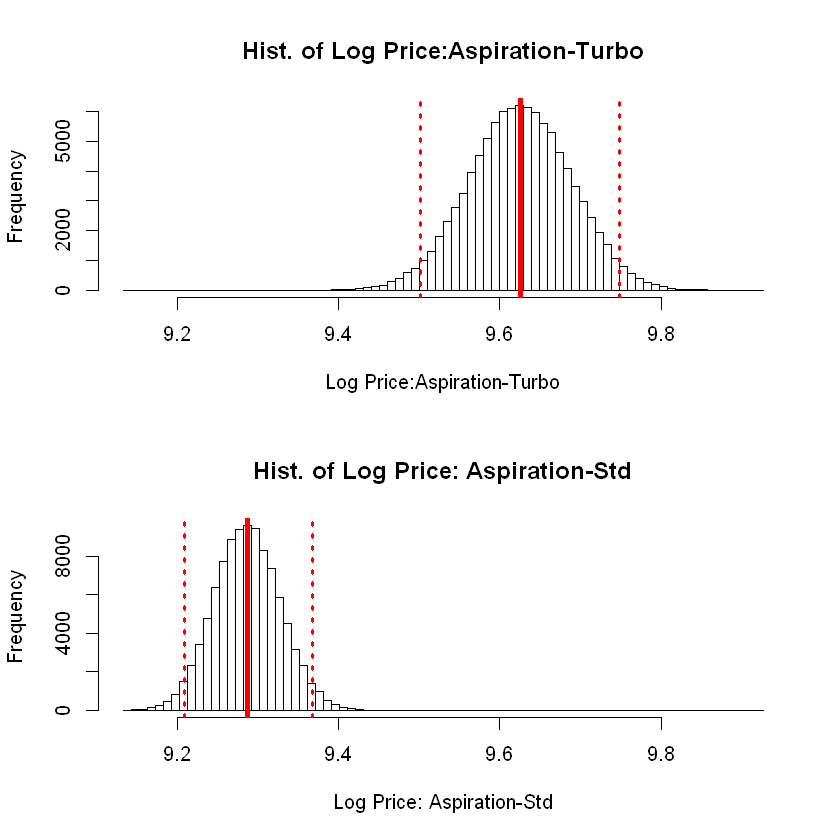

In [6]:
# Bootstrap the mean of turbos and standard aspiration
mean.boot.turbo <- one.boot(auto.turbo$log.price, mean, R = 100000)
mean.boot.std <- one.boot(auto.standard$log.price, mean, R = 100000)
plot.t(mean.boot.turbo$t, mean.boot.std$t, 
       cols = c("Log Price:Aspiration-Turbo", "Log Price: Aspiration-Std"), nbins = 80)

### Bootstrap mean difference

Here we can also examine the difference in means between turbos and standard aspiration. Using the same bootstrap concept we calculate the difference in means for each resample interation and plot the frequency distribution. The mean difference is roughly 0.35 and the lower confidence is 0.2. Since the 95% confidence interval doesn't overlap 0, from this visual we can reject the null hypothesis that the mean difference in log price is 0.  

Loading required package: repr
Warning message:
"package 'repr' was built under R version 3.3.3"

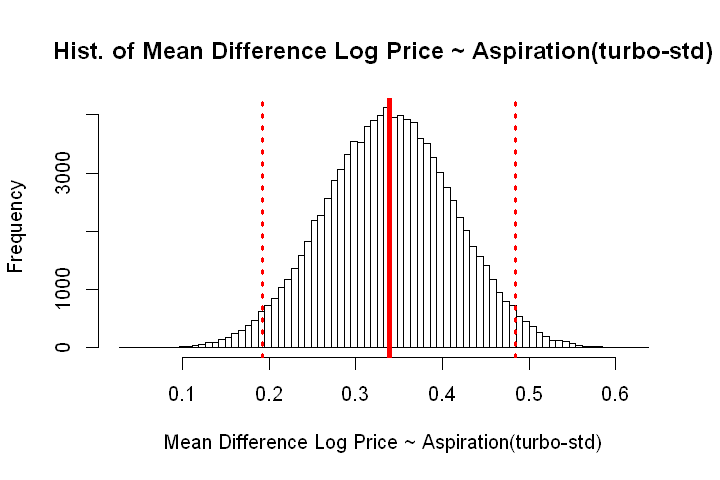

In [8]:
require(repr)
options(repr.plot.width=6, repr.plot.height=4)

two.boot.mean.asp <- two.boot(auto.turbo$log.price, auto.standard$log.price, mean, R = 100000)
plot.diff(two.boot.mean.asp$t, cols = 'Mean Difference Log Price ~ Aspiration(turbo-std)')

Additionally, we can verify that the distribution of the mean difference follows the central limit theorem with a Q-Q plot. Since the distribution of mean differeneces fall on a strait line, we can conclude that the bootstrapped mean differences are normally distributed.

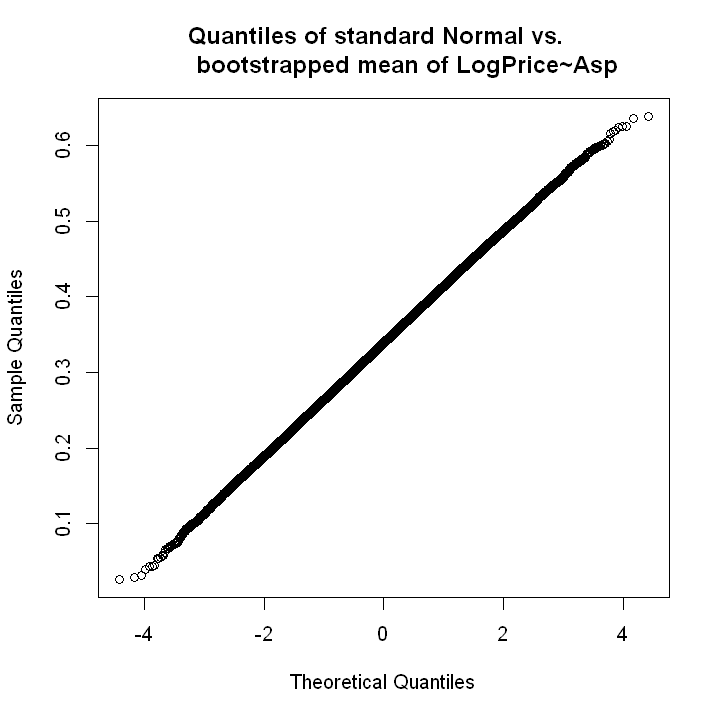

In [10]:
# Verfiy Normal
options(repr.plot.width=6, repr.plot.height=6)
qqnorm(two.boot.mean.asp$t, main = 'Quantiles of standard Normal vs. \ 
       bootstrapped mean of LogPrice~Asp')

### Numerical analysis

We can also use Welch's t-test to determine whether the means between log price ~ aspiration are different. From the t-test below we can see that the confidence interval doesn't overlap zero and the p-value is less than 0.05. We can reject the null hypothesis that the mean log price for turbos and standards are the same.  

In [11]:
# Welch's t-test
t.test(mean.boot.turbo$t, mean.boot.std$t)


	Welch Two Sample t-test

data:  mean.boot.turbo$t and mean.boot.std$t
t = 1427.8, df = 170560, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3381764 0.3391061
sample estimates:
mean of x mean of y 
 9.625976  9.287335 


### Compare to last week

Last week we determined that there was as statistically significant difference in means between log price for turbos and standard aspiration, however, the power was very low due to the low sample and small difference. With bootstrapping we see that the power increased substantially (.44 -> ~1.0)

In [12]:
# Test power bootstrap
pwr.t2n.test(n1 = length(mean.boot.turbo$t), 
             n2 = length(mean.boot.std$t), 
             d = mean(mean.boot.turbo$t) - mean(mean.boot.std$t), 
             sig.level = 0.05, power = NULL,
             alternative = "two.sided")


     t test power calculation 

             n1 = 100000
             n2 = 100000
              d = 0.3386412
      sig.level = 0.05
          power = 1
    alternative = two.sided


In [13]:
# Power non-bootstrapped.
pwr.t2n.test(n1 = length(auto.price$log.price[auto.price$aspiration == "std"]), 
             n2 = length(auto.price$log.price[auto.price$aspiration == "turbo"]), 
             d = mean(auto.price$log.price[auto.price$aspiration == "std"]) - mean(auto.price$log.price[auto.price$aspiration == "turbo"]), 
             sig.level = 0.05, power = NULL,
             alternative = "two.sided")


     t test power calculation 

             n1 = 159
             n2 = 36
              d = 0.3388682
      sig.level = 0.05
          power = 0.447117
    alternative = two.sided


## Log Price vs. Fuel Type

Next we'll compare the means of log price between diesels and gas vehicles. 

In [14]:
# log price vs. fuel type

auto.gas <- filter(auto.price, fuel.type == "gas")
auto.diesel <- filter(auto.price, fuel.type == "diesel")

### Bootstrap two means

When we look at the boot strap means between fuel and diesel, we see that the means are different, however, the confidence intervals overlap each other, therefore we can not reject the null hypothesis the mean log price for gas and diesel are different.

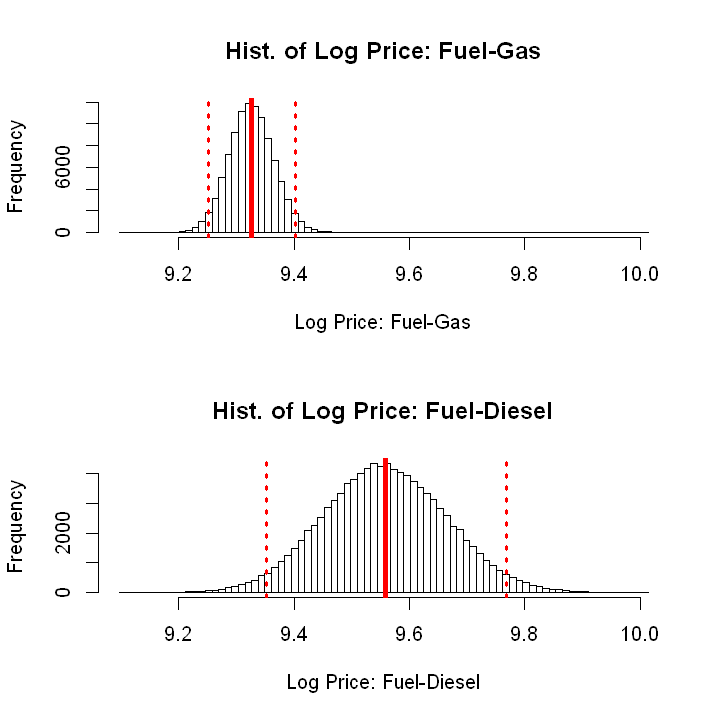

In [15]:
# Bootstrap the mean of gas and disel
mean.boot.gas <- one.boot(auto.gas$log.price, mean, R = 100000)
mean.boot.diesel <- one.boot(auto.diesel$log.price, mean, R = 100000)
plot.t(mean.boot.gas$t, mean.boot.diesel$t, 
       cols = c("Log Price: Fuel-Gas", "Log Price: Fuel-Diesel"), nbins = 80)

### Bootstrap mean difference

Here we  also examine the difference in mean log price between gas and diesels. Using the same bootstrap concept we calculate the difference in means for each resample interation and plot the frequency distribution. The mean difference is roughly -0.25 and the upper confidence level is -0.05. Since the 95% confidence interval doesn't overlap 0 (blue line), from this visual we can reject the null hypothesis that the mean difference in log price is 0. This conclusion differs from the two means analysis above.

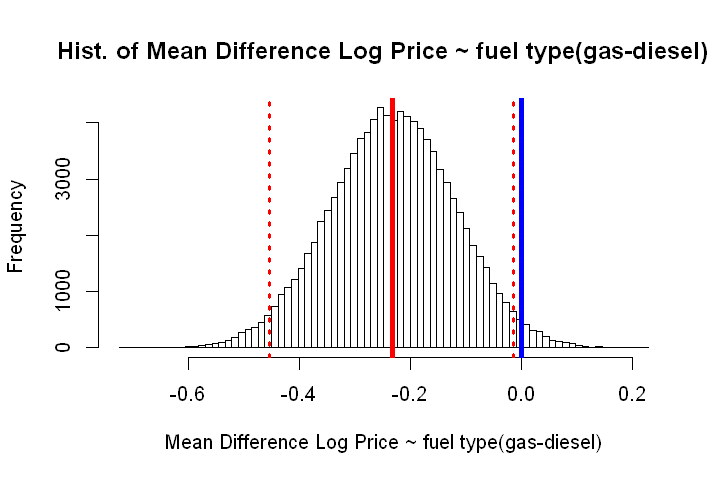

In [18]:
# Bootstrap the mean difference of turbos and standard apsiration
options(repr.plot.width=6, repr.plot.height=4)

two.boot.mean.fuel <- two.boot(auto.gas$log.price, auto.diesel$log.price, mean, R = 100000)
plot.diff(two.boot.mean.fuel$t, cols = 'Mean Difference Log Price ~ fuel type(gas-diesel)')

### Numerical analysis

We can also use Welch's t-test to determine whether the means between log price ~ fuel.type are different. From the t-test below we can see that the confidence interval doesn't overlap zero and the p-value is less than 0.05. We can reject the null hypothesis that the mean log price for gas and diesel are the same.  

In [20]:
# Welch's t-test
t.test(mean.boot.gas$t, mean.boot.diesel$t)


	Welch Two Sample t-test

data:  mean.boot.gas$t and mean.boot.diesel$t
t = -650.6, df = 125730, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2325076 -0.2311109
sample estimates:
mean of x mean of y 
 9.325843  9.557653 


### Compare to last week

Last week, using the t-test, we determined that there was no statistical difference in means between log price for gas and diesel cars, and  the power was very low due to the low sample and small difference. With bootstrapping we see that the power increased substantially (.16 -> 1.0). From bootstrapping with a t-test, we are able to reject the null hypothesis that the difference in means between gas and diesel are the same.

In [21]:
# power with bootstrapping
pwr.t2n.test(n1 = length(mean.boot.gas$t), 
             n2 = length(mean.boot.diesel$t), 
             d = mean(mean.boot.gas$t) - mean(mean.boot.diesel$t), 
             sig.level = 0.05, power = NULL,
             alternative = "two.sided")


     t test power calculation 

             n1 = 100000
             n2 = 100000
              d = 0.2318092
      sig.level = 0.05
          power = 1
    alternative = two.sided


In [22]:
# power without bootstrapping
pwr.t2n.test(n1 = length(auto.price$log.price[auto.price$fuel.type == "diesel"]), 
             n2 = length(auto.price$log.price[auto.price$fuel.type == "gas"]), 
             d = abs(mean(auto.price$log.price[auto.price$fuel.type == "diesel"]) - mean(auto.price$log.price[auto.price$fuel.type == "gas"])), 
             sig.level = 0.05, power = NULL,
             alternative = "two.sided")


     t test power calculation 

             n1 = 20
             n2 = 175
              d = 0.2315443
      sig.level = 0.05
          power = 0.1642492
    alternative = two.sided


##  Log Price vs. Body Style

Last week we examined log price against body style using an ANOVA and Tukey's HSD. In this analysis we'll use the aforementioned bootstrapping and plot functions in a pair-wise comparison for each body-style combination. 

### Main execution function

The following function takes all possible body-style combinations and builds a bootstrapped mean difference plot and a t-test for each combination.

In [25]:
boot.comb <- function(a = auto.price, f = auto.price$body.style, n = 100){
  split.a <- split(a, f)        # split on body style
  names.col <- names(split.a)   # get names
  i <- length(split.a)
  y <- combn(i, 2) # get all combinations
  
  df <- data.frame()
    
  #iterate and put bootstrapped means into one df.
  for(j in 1:length(split.a)){
      if(j==1){
          split.a.boot <- one.boot(split.a[[j]]$log.price, mean, R = n)$t
      } else {
          split.a.boot <- cbind(split.a.boot, one.boot(split.a[[j]]$log.price, mean, R = n)$t)
      }
    
  }
  
  # set layout for graphing mean differences
  ml <- matrix(0, ncol = i-1, nrow = i-1)
  mcol <- 1
  mrow <- 1
  for(l in 1:ncol(y)){
    ml[mrow, mcol] <- l
    if (l != ncol(y)){
      if(y[1, l] != y[1,l+1]){
        mcol <- 1
        mrow <- mrow + 1 }
      else {
        mcol <- mcol + 1
      }
    }
  }
  
  layout(matrix(as.numeric(matrix(ml, nrow = i-1, byrow = T)), nrow = i-1, byrow=T))
  
  for(x in 1:ncol(y)){
      
    # build t-test table
    x.1 <- y[1,x]
    x.2 <- y[2,x]
    t <- t.test(split.a.boot[,x.1], split.a.boot[,x.2])
    r <-  c(names.col[x.1],
            names.col[x.2],
            as.numeric(t$estimate[1]),
            as.numeric(t$estimate[2]),
            as.numeric(t$estimate[1]) - as.numeric(t$estimate[2]),
            as.numeric(t$conf.int)[1],
            as.numeric(t$conf.int)[2],
            as.numeric(t$p.value))
    r <- as.data.frame(t(r))
    df <- rbind(df, r)
    # calculate mean differences and plot
    two.boot.mean <- two.boot(split.a[[x.1]]$log.price, split.a[[x.2]]$log.price, mean, R = n)
    plot.diff(two.boot.mean$t, cols = paste(names.col[x.1], names.col[x.2], sep = "-"))
  }
  
  colnames(df) <- c('body.1', 'body.2', 
                    'mean.1', 'mean.2 ',
                    'mean.diff', 'lower', 'upper', 'p.value')
  df[, 3:ncol(df)] <- lapply(df[,3:ncol(df)], as.character)
  df[, 3:ncol(df)] <- lapply(df[,3:ncol(df)], as.numeric)
  df[, 3:ncol(df)] <- lapply(df[,3:ncol(df)], round, digits = 5)
  
  par(mfrow =c(1,1))
  
  return(df)
}

### Numerical and Graphical

When executing the funtion above we get two outputs. First we get a table generated from executing t-tests on the bootstrapped means of log price for every body style combo. Second we see a layout of histograms of the mean differences in log price for every combination. 

From the table we see that every combination results in mean difference that is statistically differenent because the confidence intervals don't overlap zero and the p-values are essentially zero. From the histograms of the log price mean differences, there are several combinations that conflict with the numerical t-tests. Conv-hardtop, hardtop-sedan, hardtop-wagon, and sedan wagon have confidence intervals that overlap zero (blue line inside of dotted reds) and therefore we must not reject that the mean differences are the same.

body.1,body.2,mean.1,mean.2,mean.diff,lower,upper,p.value
convertible,hardtop,9.89099,9.79414,0.09685,0.09500,0.09870,0
convertible,hatchback,9.89099,9.10544,0.78555,0.78438,0.78672,0
convertible,sedan,9.89099,9.43867,0.45233,0.45115,0.45350,0
convertible,wagon,9.89099,9.35998,0.53101,0.52979,0.53224,0
hardtop,hatchback,9.79414,9.10544,0.68870,0.68720,0.69020,0
hardtop,sedan,9.79414,9.43867,0.35548,0.35397,0.35698,0
hardtop,wagon,9.79414,9.35998,0.43416,0.43262,0.43571,0
hatchback,sedan,9.10544,9.43867,-0.33322,-0.33367,-0.33277,0
hatchback,wagon,9.10544,9.35998,-0.25454,-0.25510,-0.25397,0
sedan,wagon,9.43867,9.35998,0.07869,0.07811,0.07926,0


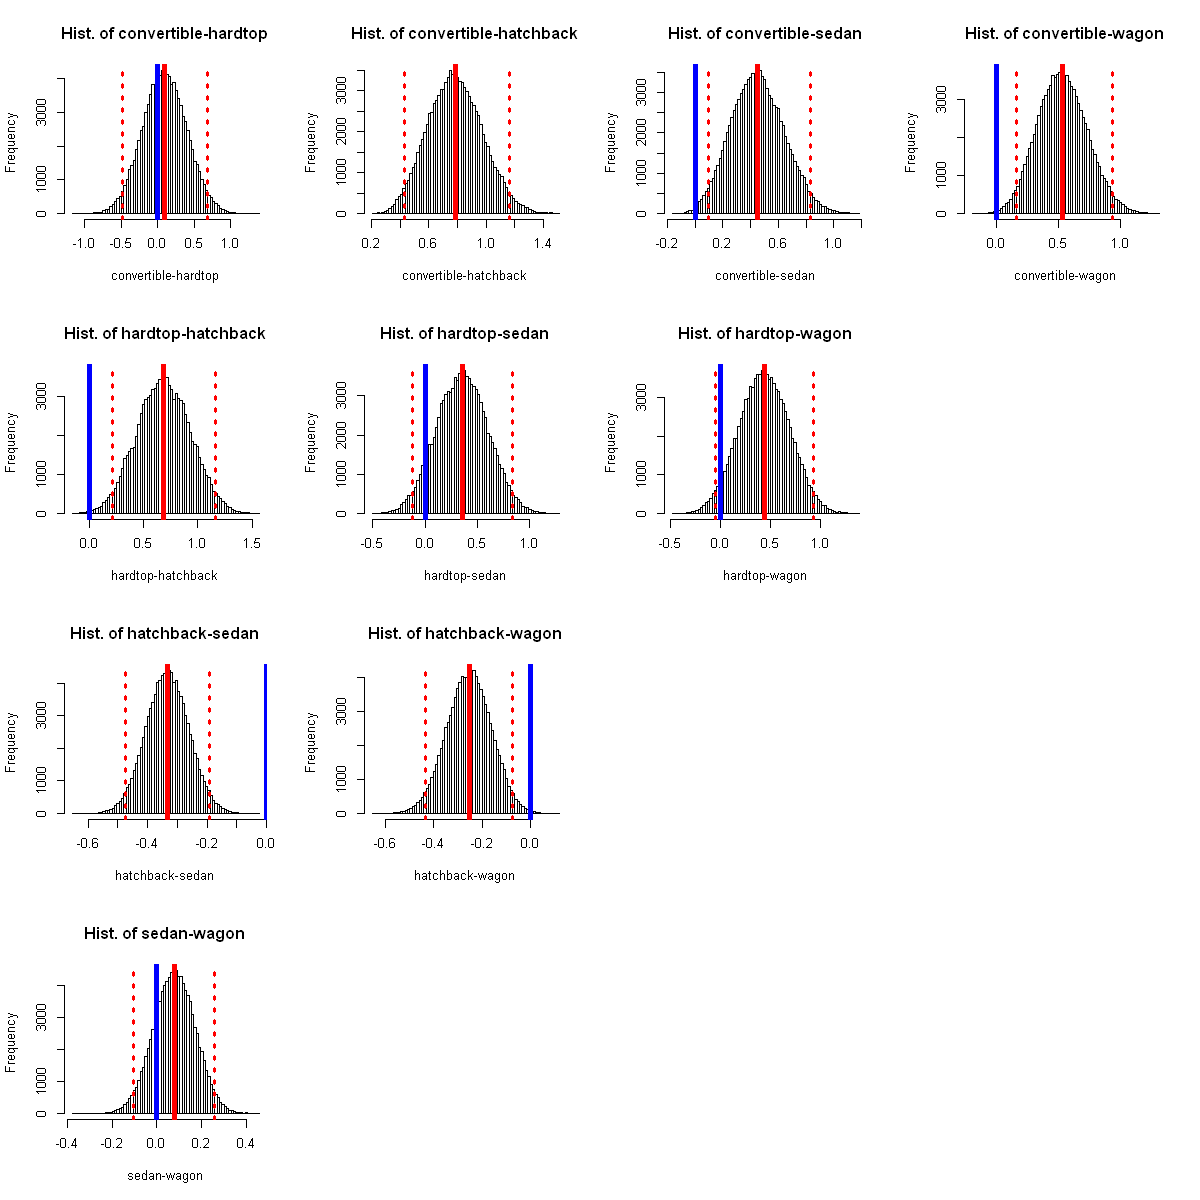

In [26]:
options(repr.plot.width=10, repr.plot.height=10)
g <- boot.comb(a = auto.price, f = auto.price$body.style, n =100000)
g

### Comparison to last week

Last week when running a Tukey HSD on all combinations we saw that the only difference in means was for the hatchback-sedan. While running bootstrap of the means we see that several other combinations, such as all hatchback and three convertible combos (one overlap) we can safely reject the null hypothesis. Additionally, last week we didn't include convertibles and hardtops since they had low sample sizes and thus power. We've included them here and several have significant mean differences. 